In [1]:

# NAME  :   TANU GOYAL
# KNN ON FRUIT 360 DATA

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#importing all the modules
import os
import pandas as pd
from PIL import Image
from numpy import asarray

#for training data
t1=[]
t3=[]
path_directory='/content/drive/MyDrive/Colab Notebooks/fruits-360-original-size/fruits-360-original-size/Training'
for root,dirs,files in os.walk(path_directory):
  for name in files:
    f=os.path.join(root,name)
    normalized_path = os.path.normpath(f)
    path_components = normalized_path.split(os.sep)#splitting each part of the path
    t3.append(path_components[8]) #saving the label to t3 list
    imgs=Image.open(f)
    imgs=imgs.resize((28,28),Image.NEAREST)#resizing the image
    imgGray = imgs.convert('L')#converting image to grey scale
    ar1=asarray(imgGray)#converting image to array
    ar12=ar1.flatten()#flattening the array
    list=ar12.tolist()#converting array to list
    t1.append(list)#adding list to another list t1




In [ ]:
len(t1)


6231

In [ ]:
#converting t1 to data frame
import pandas as pd
df=pd.DataFrame(t1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,253,150,149,147,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,254,149,149,146,...,255,255,254,255,255,255,255,255,255,255
4,255,255,255,255,254,254,253,152,149,146,...,255,255,254,255,255,255,255,255,255,255


In [ ]:
df['Label']=t3

In [ ]:
#saving as csv
df.to_csv('/content/drive/MyDrive/Colab Notebooks/file1.csv',index=False)

In [ ]:
#  doing same for test data
t2=[]
t4=[]
path_directory='/content/drive/MyDrive/Colab Notebooks/fruits-360-original-size/fruits-360-original-size/Test'
for root,dirs,files in os.walk(path_directory):
  for name in files:
    f=os.path.join(root,name)
    normalized_path = os.path.normpath(f)
    path_components = normalized_path.split(os.sep)
    t4.append(path_components[8])
    imgs=Image.open(f)
    imgs=imgs.resize((28,28),Image.NEAREST)
    imgGray = imgs.convert('L')
    ar1=asarray(imgGray)
    ar12=ar1.flatten()
    list=ar12.tolist()
    t2.append(list)

In [ ]:
#saving file for test data
import pandas as pd
df2=pd.DataFrame(t2)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,254,155,149,146,...,106,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,253,154,148,146,...,107,129,254,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,254,254,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,250,153,149,149,...,105,122,255,253,255,255,255,255,255,255
4,255,255,255,255,255,255,254,157,148,151,...,113,121,255,255,255,255,255,255,255,255


In [ ]:
df2['Label']=t4

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/file2.csv',index=False)

In [ ]:
#reading the test and train file

fruit_train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file1.csv')
fruit_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file2.csv')

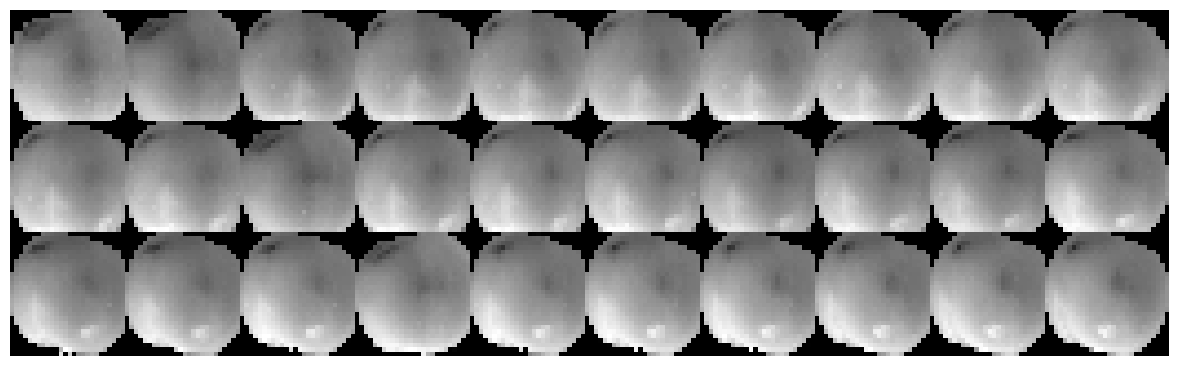

In [ ]:
#using matplotlib visulaizing the data

import matplotlib.pyplot as plt
samples = fruit_train.iloc[0:30,:784].values
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape(28,28),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()



In [ ]:
print(fruit_train.shape, fruit_test.shape)

(6231, 785) (3110, 785)


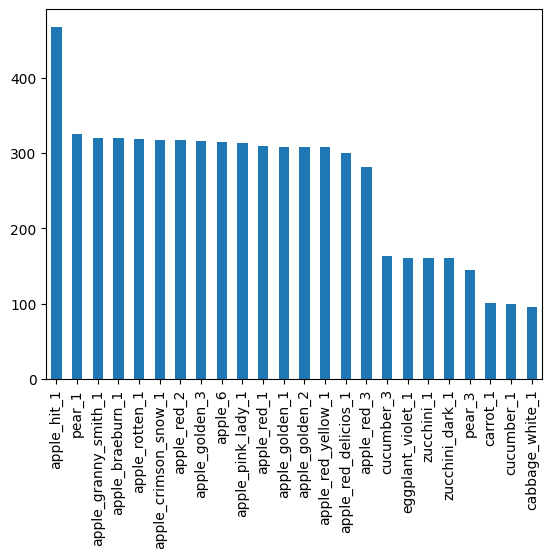

In [ ]:
#Check whether data is balanced or imbalanced
_ = fruit_train['Label'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#taking attributes as x and label y

X_raw = fruit_train.drop(['Label'], axis = 1, inplace = False)
y = fruit_train['Label']

In [ ]:
#Data is being Scaled now to make it uniform

from sklearn import preprocessing
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

In [ ]:
X.max()

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
779    1.0
780    1.0
781    1.0
782    1.0
783    1.0
Length: 784, dtype: float64

In [ ]:
#principal component analysis for visulaization

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, fruit_train[['Label']]], axis = 1)


['#10AEFD', '#DB9758', '#F71252', '#07981E', '#6985B5', '#ECD75A', '#FB8B34', '#8E1730', '#52099B', '#119D58', '#FAEC7F', '#A7D1D6', '#26F52E', '#7FFF90', '#B8E9C8', '#16D018', '#D73E2B', '#470247', '#B5CD44', '#C361DC', '#D7AFEA', '#913668', '#864EF3', '#E9E5C5']


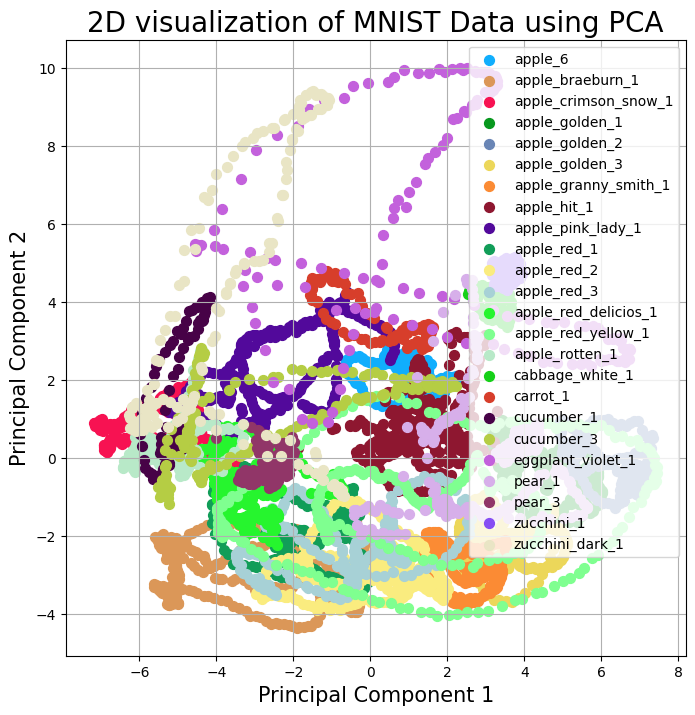

In [ ]:
#visulaizing the data after PCA

import random
from random import randint
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

target =fruit_train['Label'].unique()
targets=target.tolist()
random.seed(10)
colors = []
for i in range(24):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['Label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


In [ ]:
# splitting data into test and training data set

from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)


(3738, 784) (1558, 784) (935, 784) (3738,) (1558,) (935,)


In [ ]:

#using the model KNN
#defining the function to train the mode

def trainKNN(X_train, y_train, k):
    """Function to train model using KNN classifier
    Takes argumenst as training dataset, k-value and returns classifier
    """
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [ ]:
#defining the function to predict

def predictClassifier(X_test, classifier):
    """Function to predict labels using classifier
       Takes argumenst as test/cv dataset, and returns predicted values by model
    """
    y_pred = classifier.predict(X_test)
    return y_pred

In [ ]:
#defining the function to calculate accuracy

def calculateAccuracy(y_pred, y_test):
    """Function to check accuracy of the model. Takes input arguments as actual and predicted values
       and returns accuracy score
    """
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [ ]:
# training the model using train data and calculating the accuracy

from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)

100%|██████████| 9/9 [00:06<00:00,  1.47it/s]


In [ ]:
AccuracyList

[1.0,
 0.9978609625668449,
 0.9871657754010695,
 0.9529411764705882,
 0.9144385026737968,
 0.8866310160427807,
 0.8577540106951872,
 0.8352941176470589,
 0.8149732620320855]

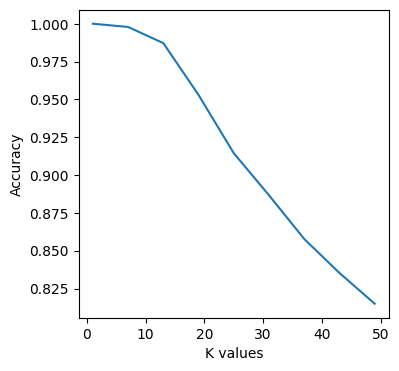

In [ ]:
#plotting the accuracy according to k values

f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [ ]:
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

Final Accuracy:  0.824775353016688


################# Confusion Matrix ####################


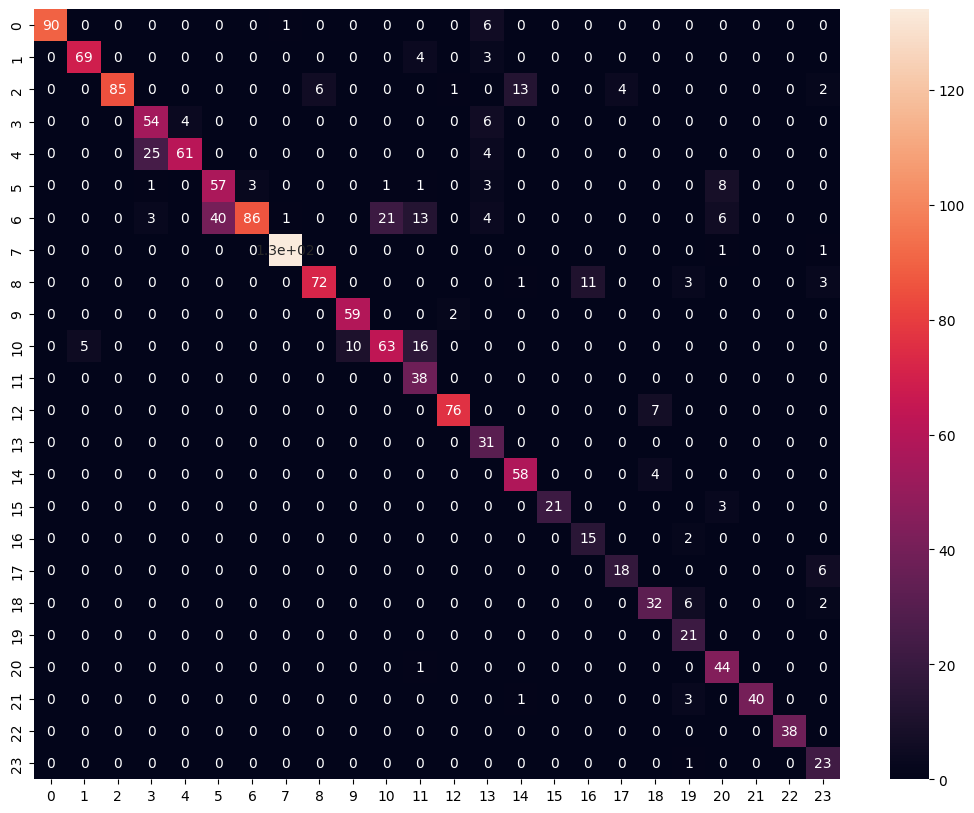

In [ ]:
#creating a confusion matrix

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);